# Extension 1 - Your own data

Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

In [26]:
# Importing the required stuff

import os
import random
import numpy as np
import matplotlib.pyplot as plt

from data import Data
from linear_regression import LinearRegression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# Importing the data
penguins_filename = 'data/penguins.csv'
penguins_data = Data(penguins_filename)
# Printing the data
print(penguins_data)

# Create a linear regression model
penguins_reg = LinearRegression(penguins_data)

data/penguins.csv (342x4)
Headers:
  bill_length_mm	  bill_depth_mm	  flipper_length_mm	  body_mass_g	
-----------------------
Showing first 5/342 rows.
39.1	18.7	181.0	3750.0	
39.5	17.4	186.0	3800.0	
40.3	18.0	195.0	3250.0	
36.7	19.3	193.0	3450.0	
39.3	20.6	190.0	3650.0	



In [28]:
# Linear regression with longer bills, deeper bills, and longer flippers as independent variables and body mass as dependent variable
penguins_reg.linear_regression(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], 'body_mass_g')

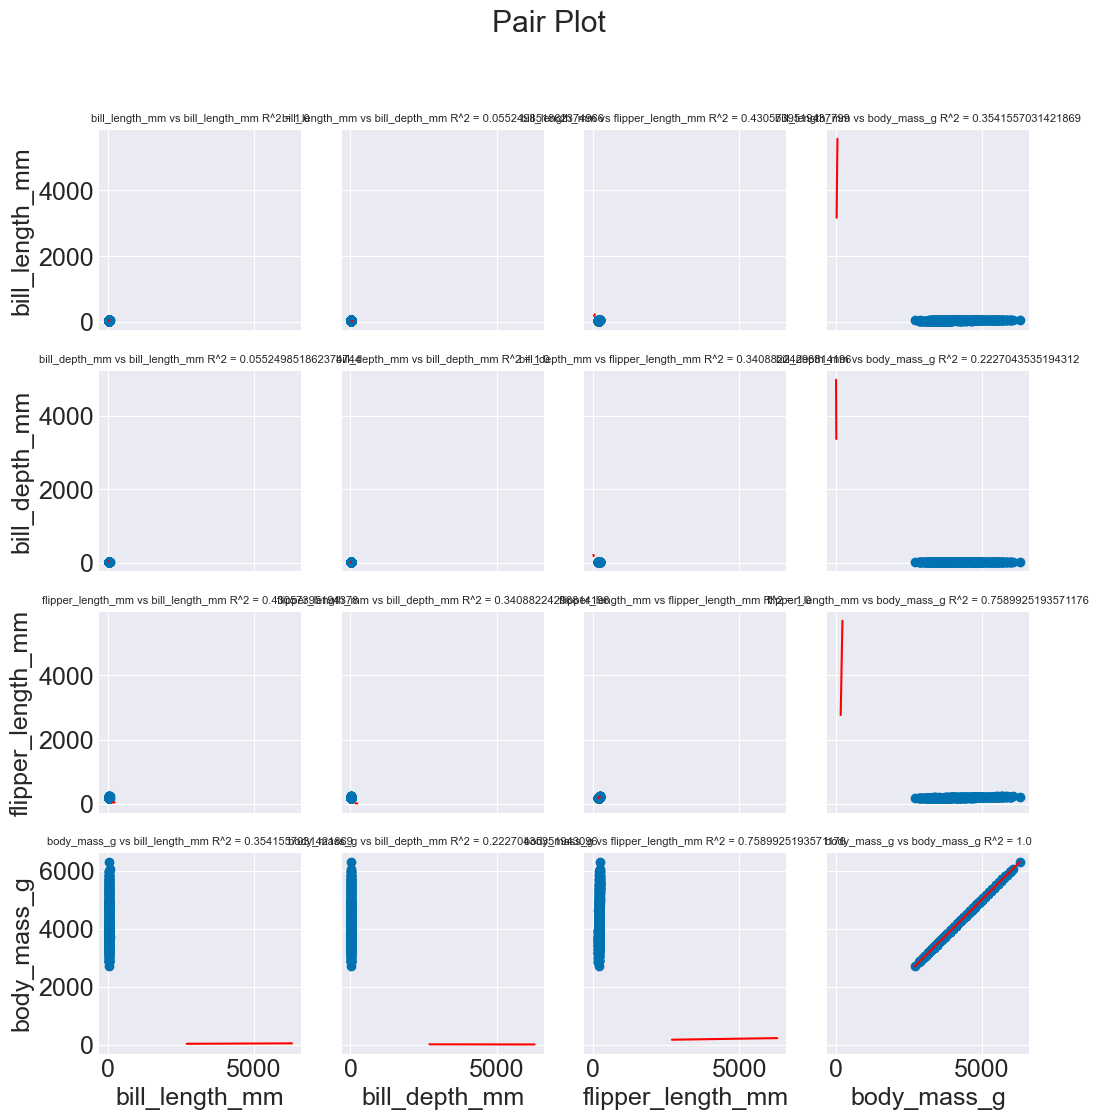

In [29]:
# Plotting pairplot without the histograms on the diagonal
penguins_reg.pair_plot(penguins_data.get_headers(), hists_on_diag = False)

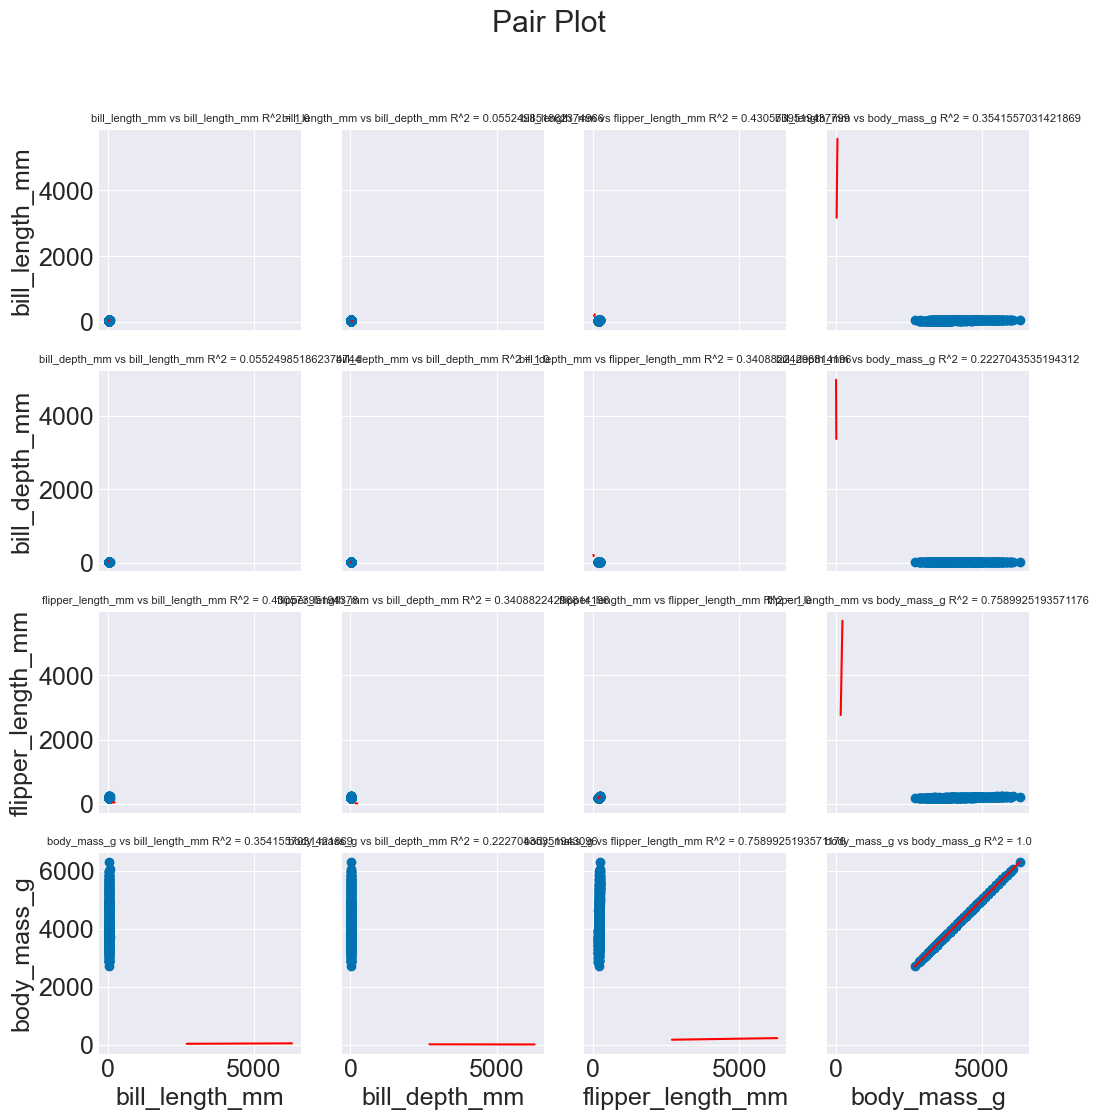

In [30]:
# Plotting pairplot with the histograms on the diagonal
penguins_reg.pair_plot(penguins_data.get_headers(), hists_on_diag = False)

The hypothesis for the linear regression of bill length and bill depth is that there is a significant and positive linear relationship between these variables. Specifically, we can hypothesize that penguins with longer bills tend to have deeper bills as well. This hypothesis is based on the fact that these physical characteristics are important for a penguin's ability to catch and consume food, which can contribute to greater catching ability.

Furthermore, exploring this relationship through linear regression can provide insights into the relative importance of each physical characteristic as a predictor of body mass, and can also help us identify potential outliers or other factors that might influence this relationship. This information can be valuable for understanding the health and survival of penguins in different species and locations, and can also provide insights into how environmental changes or other factors might impact these relationships over time.

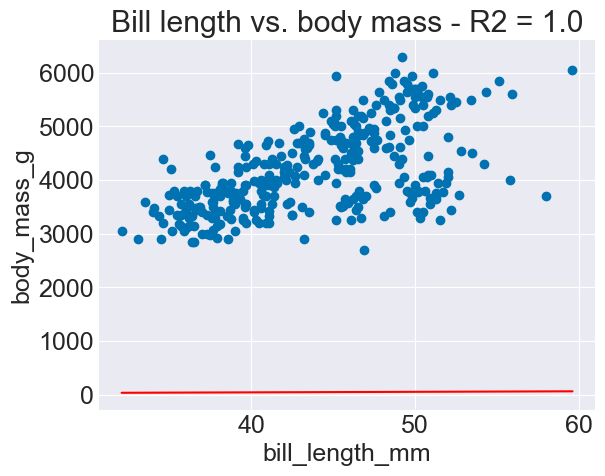

In [31]:
# Plotting the first set of variables in our hypothesis
penguins_reg.scatter('bill_length_mm', 'body_mass_g', title = 'Bill length vs. body mass')

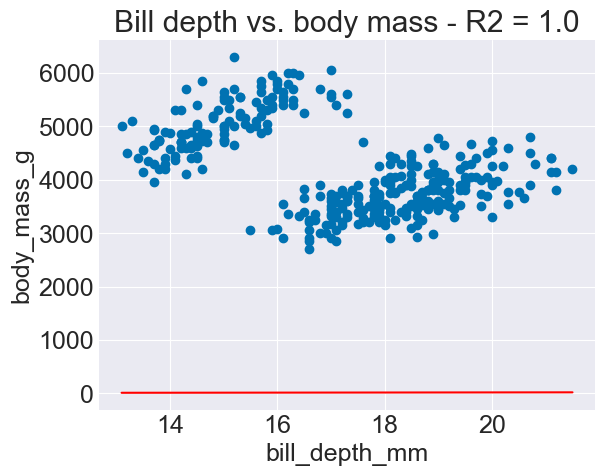

In [32]:
# Plotting the second set of variables in our hypothesis
penguins_reg.scatter('bill_depth_mm', 'body_mass_g', title = 'Bill depth vs. body mass')

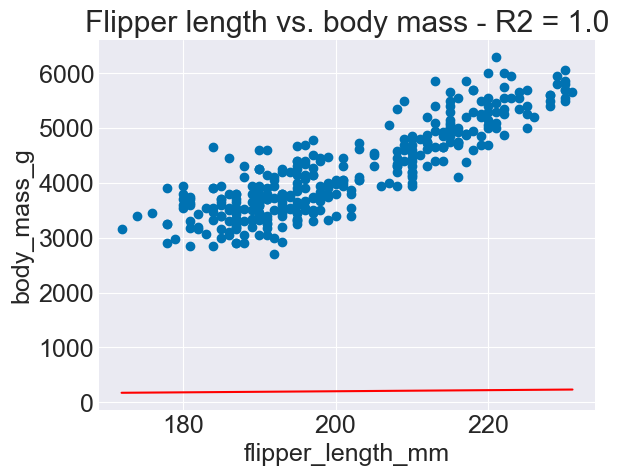

In [33]:
# Plotting the third set of variables in our hypothesis
penguins_reg.scatter('flipper_length_mm', 'body_mass_g', title = 'Flipper length vs. body mass')

In [34]:
# Printing the regression fitted slope coefficients shape
print('Regression fitted slope coefficients shape:', penguins_reg.slope.shape)
print()
# Printing the regression fitted slope coefficients
print('Regression fitted slope coefficients: ', penguins_reg.slope)
print()
# Printing the regression fitted intercept
print('Regression fitted intercept: ', penguins_reg.intercept)
print()

Regression fitted slope coefficients shape: (1, 1)

Regression fitted slope coefficients:  [[1.]]

Regression fitted intercept:  3.2499225469052417e-12



In [35]:
# Running predict on the data
penguins_predict_data = Data(penguins_filename)
penguins_predict_data.limit_samples(0, 10)
penguins_reg_predict = LinearRegression(penguins_predict_data)
penguins_reg_predict.linear_regression(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], 'body_mass_g')
penguins_predict_values = penguins_reg_predict.predict()

# Printing the shape of the predicted values
print('Predicted values shape:', penguins_predict_values.shape)
print()
# Printing the predicted values
print('Predicted values:', penguins_predict_values)

Predicted values shape: (10, 1)

Predicted values: [[3733.84341]
 [3565.11938]
 [3724.79874]
 [3708.47705]
 [4060.467  ]
 [3581.50783]
 [3908.67276]
 [3365.98579]
 [4159.35118]
 [3416.77685]]


In [36]:
# Computing linear regression statistics
penguins_reg.linear_regression(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], 'body_mass_g')

# Shapes of instance variables
print('Shapes of instance variables:')
print('A shape:', penguins_reg.A.shape)
print('y shape:', penguins_reg.y.shape)
print('slope shape:', penguins_reg.slope.shape)
print('intercept shape:', penguins_reg.intercept.shape)
print('residuals shape:', penguins_reg.residuals.shape)
print('r2 shape:', penguins_reg.R2.shape)
print('mse shape:', penguins_reg.mse.shape)
print()

# Printing the linear regression statistics
print('Linear regression statistics:')
print('A:', penguins_reg.A)
print('y:', penguins_reg.y)
print('slope:', penguins_reg.slope)
print('intercept:', penguins_reg.intercept)
print('residuals:', penguins_reg.residuals[:5].T)
print('r2:', penguins_reg.R2)
print('mse:', penguins_reg.mse)
print()

Shapes of instance variables:
A shape: (342, 3)
y shape: (342, 1)
slope shape: (3, 1)
intercept shape: ()
residuals shape: (342, 1)
r2 shape: ()
mse shape: ()

Linear regression statistics:
A: [[ 39.1  18.7 181. ]
 [ 39.5  17.4 186. ]
 [ 40.3  18.  195. ]
 ...
 [ 50.4  15.7 222. ]
 [ 45.2  14.8 212. ]
 [ 49.9  16.1 213. ]]
y: [[3750.]
 [3800.]
 [3250.]
 [3450.]
 [3650.]
 [3625.]
 [4675.]
 [3475.]
 [4250.]
 [3300.]
 [3700.]
 [3200.]
 [3800.]
 [4400.]
 [3700.]
 [3450.]
 [4500.]
 [3325.]
 [4200.]
 [3400.]
 [3600.]
 [3800.]
 [3950.]
 [3800.]
 [3800.]
 [3550.]
 [3200.]
 [3150.]
 [3950.]
 [3250.]
 [3900.]
 [3300.]
 [3900.]
 [3325.]
 [4150.]
 [3950.]
 [3550.]
 [3300.]
 [4650.]
 [3150.]
 [3900.]
 [3100.]
 [4400.]
 [3000.]
 [4600.]
 [3425.]
 [2975.]
 [3450.]
 [4150.]
 [3500.]
 [4300.]
 [3450.]
 [4050.]
 [2900.]
 [3700.]
 [3550.]
 [3800.]
 [2850.]
 [3750.]
 [3150.]
 [4400.]
 [3600.]
 [4050.]
 [2850.]
 [3950.]
 [3350.]
 [4100.]
 [3050.]
 [4450.]
 [3600.]
 [3900.]
 [3550.]
 [4150.]
 [3700.]
 [4250